# Exponential smoothing

### For theories summarized well in here
https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

# Simple Exponential Smoothing
## Let's use Simple Exponential Smoothing to forecast the below oil data

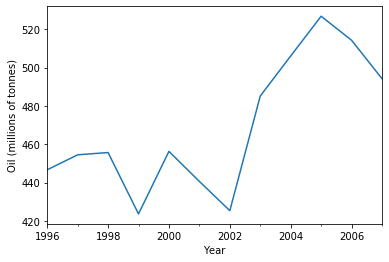

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007


In [2]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
plt.show()
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007")

Here we run three variants of simple exponential smoothing:
 1. In fit1 $\alpha$ = 0.2
 2. In fit2 $\alpha$ = 0.6
 3. In fit3 we allow statsmodels to automatically find an optimized $\alpha$ value for us. 

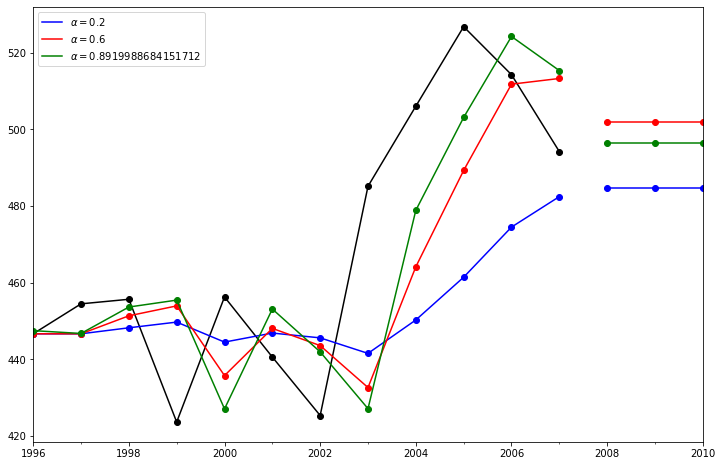

In [3]:
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = oildata.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')

plt.show()

# Holt's Method

We use air pollution data and the Holt's Method. 
1. In fit1 $\alpha = 0.8$ and $\beta = 0.2$
2. In fit2 an exponential model rather than a Holt's additive model
3. In fit3 a damped versions of the Holt's additive model with the dampening parameter $\phi$ optimized

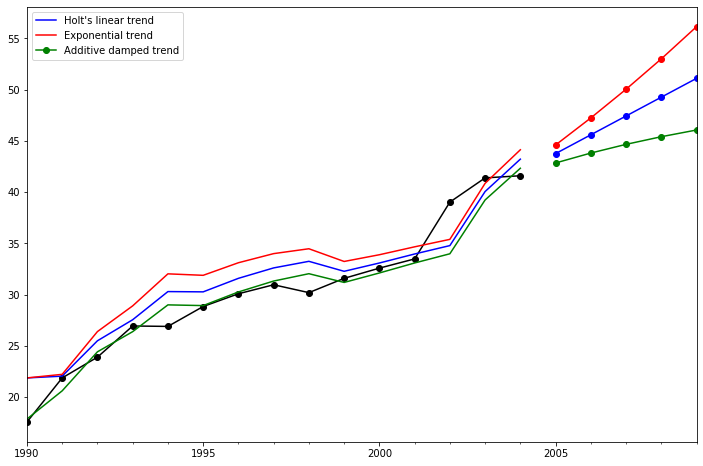

In [4]:
fit1 = Holt(air).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

ax = air.plot(color='black', marker='o', figsize=(12,8))
fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', marker='o', legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', marker='o', legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
fcast3.plot(ax=ax, color='green', marker='o', legend=True)

plt.show()

## Seasonally adjusted data
Lets look at some seasonally adjusted livestock data. We fit five Holt's models. The below table allows us to compare results when we use exponential versus additive and damped versus non-damped.

Note: fit4 does not allow the parameter  𝜙  to be optimized by providing a fixed value of  𝜙=0.98

In [5]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fit2 = Holt(livestock2).fit()
fit3 = Holt(livestock2, exponential=True).fit()
fit4 = Holt(livestock2, damped=True).fit(damping_slope=0.98)
fit5 = Holt(livestock2, exponential=True, damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results = pd.DataFrame(index=[r"$\alpha$", r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"], columns=['SES', "Holt's", "Exponential", "Additive", "Multiplicative"])
results["SES"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] = [fit2.params[p] for p in params] + [fit1.sse]
results["Exponential"] = [fit3.params[p] for p in params] + [fit1.sse]
results["Additive"] = [fit4.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit1.sse]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974306,0.977633,0.978848,0.974911
$\beta$,NaN,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981646
$l_0$,263.917700,258.882590,260.341566,257.357671,258.951854
$b_0$,NaN,5.010792,1.013780,6.644550,1.038144
SSE,6761.350218,6761.350218,6761.350218,6761.350218,6761.350218


## Plots of Seasonally Adjusted Data
The following plots allow us to evaluate the level and slope/trend components of the above table's fits.

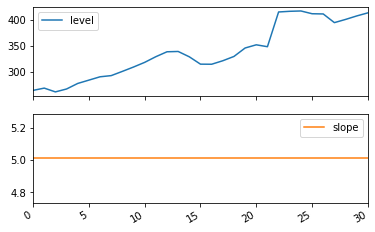

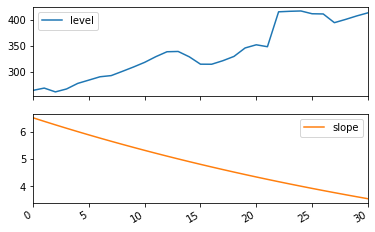

Figure 7.4: Level and slope components for Holt's linear trend method and the additive damped trend method.


In [6]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level, fit.slope]).rename(
        columns={0:'level', 1:'slope'}).plot(subplots=True)
plt.show()
print("Figure 7.4: Level and slope components for Holt's linear trend method and the additive damped trend method.")

## Comparison
Here we plot a comparison Simple Exponential Smoothing and Holt's Methods for various additive, exponential and damped combinations. All of the models parameters will be optimized by statsmodels.



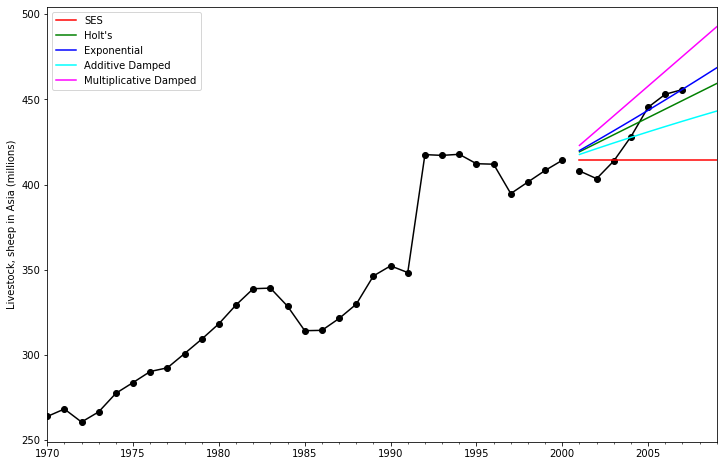

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods


In [7]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2).fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True).fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(livestock2, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color='black', marker='o', figsize=(12,8))
livestock3.plot(ax=ax, color='black', marker='o', legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods')

## Holt's Winters Seasonal
Finally we are able to run full Holt's Winters Seasonal Exponential Smoothing including a trend component and a seasonal component. statsmodels allows for all the combinations including as shown in the examples below:

fit1 additive trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation.
fit2 additive trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation..
fit3 additive damped trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation.
fit4 additive damped trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation.
The plot shows the results and forecast for fit1 and fit2. The table allows us to compare the results and parameterizations.



/Users/nbeyond/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/nbeyond/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


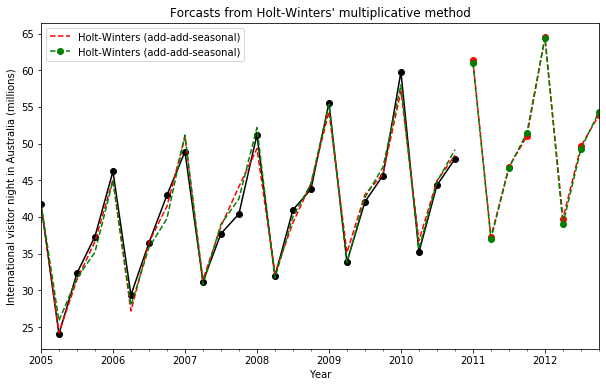

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality


,Additive,Multiplicative,Additive Dam,Multiplicative Dam
$\alpha$,4.546426e-01,3.657462e-01,5.517271e-09,0.000189
$\beta$,1.558827e-08,5.586958e-17,1.884171e-09,0.000189
$\phi$,NaN,NaN,9.410035e-01,0.914092
$\gamma$,5.243754e-01,8.112331e-11,6.738179e-07,0.000000
$l_0$,1.421752e+01,1.454900e+01,1.413852e+01,14.534822
$b_0$,1.307747e-01,1.661281e-01,2.523483e-01,0.484337
SSE,5.001685e+01,4.306869e+01,3.542030e+01,39.924393


In [8]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)

results = pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']

results['Additive'] = [fit1.params[p] for p in params] + [fit1.sse]
results['Multiplicative'] = [fit2.params[p] for p in params] + [fit2.sse]
results['Additive Dam'] = [fit3.params[p] for p in params] + [fit3.sse]
results['Multiplicative Dam'] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forcasts from Holt-Winters' multiplicative method")
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality")

results

## The Internals
It is possible to get at the internals of the Exponential Smoothing models.

Here we show some tables that allow you to view side by side the original values $y_t$, the level $l_t$, the trend $b_t$, the season $s_t$ and the fitted values $\hat{y}_t$.

In [9]:
df = pd.DataFrame(np.c_[aust, fit1.level, fit1.slope, fit1.season, fit1.fittedvalues],
                 columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'], index=aust.index)
df.append(fit1.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,41.721329,-34.969360,49.317660,-7.593315,41.7275
2005-04-01,24.190414,-35.452692,49.932326,-25.834490,24.0418
2005-07-01,31.460319,-36.532817,51.126153,-19.183032,32.3281
2005-10-01,36.634562,-37.397744,52.210202,-15.209885,37.3287
2006-01-01,45.097767,-38.467300,53.476821,-7.837246,46.2132
2006-04-01,27.191893,-40.276300,55.513847,-27.017258,29.3463
2006-07-01,36.544198,-40.625041,56.224471,-19.713862,36.4829
2006-10-01,41.449354,-42.041839,57.766157,-15.523415,42.9777
2007-01-01,50.934464,-41.543826,57.536765,-7.588760,48.9015
2007-04-01,31.418191,-42.197876,58.151044,-26.874344,31.1802


In [10]:
df = pd.DataFrame(np.c_[aust, fit2.level, fit2.slope, fit2.season, fit2.fittedvalues], 
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df.append(fit2.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,41.861351,-36.533371,51.248495,0.815861,41.7275
2005-04-01,25.838942,-35.870391,50.740531,0.495353,24.0418
2005-07-01,31.660042,-37.286792,52.064068,0.612963,32.3281
2005-10-01,35.190010,-39.171423,54.189837,0.664157,37.3287
2006-01-01,44.928965,-40.308267,55.708504,0.815020,46.2132
2006-04-01,27.933387,-42.089524,57.758585,0.493034,29.3463
2006-07-01,35.823951,-43.102640,59.129621,0.610071,36.4829
2006-10-01,39.768221,-45.645710,61.908999,0.661681,42.9777
2007-01-01,51.173494,-45.124056,61.859241,0.813562,48.9015
2007-04-01,30.814241,-46.411340,63.138157,0.490279,31.1802


Finally lets look at the levels, slopes/trends and seasonal components of the models.

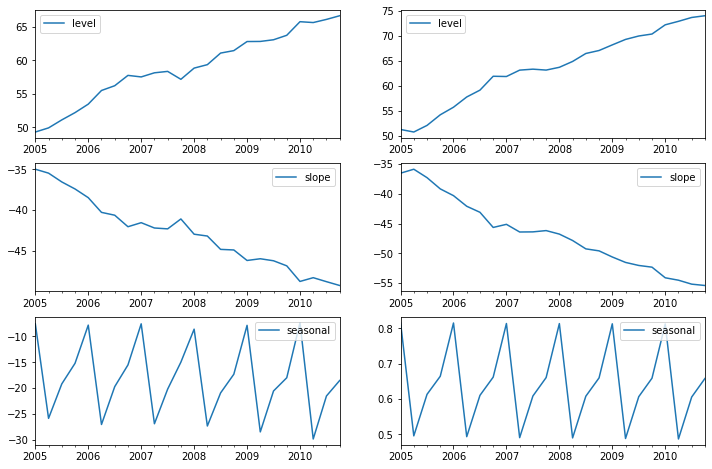

In [11]:
states1 = pd.DataFrame(np.c_[fit1.level, fit1.slope, fit1.season], columns=['level', 'slope', 'seasonal'], index=aust.index)
states2 = pd.DataFrame(np.c_[fit2.level, fit2.slope, fit2.season], columns=['level', 'slope', 'seasonal'], index=aust.index)

fig, [[ax1, ax4], [ax2, ax5], [ax3, ax6]] = plt.subplots(3,2, figsize=(12,8))
states1[['level']].plot(ax=ax1)
states1[['slope']].plot(ax=ax2)
states1[['seasonal']].plot(ax=ax3)
states2[['level']].plot(ax=ax4)
states2[['slope']].plot(ax=ax5)
states2[['seasonal']].plot(ax=ax6)

plt.show()